In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [4]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin')

In [5]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename({'v1':'label','v2':'message'},axis=1,inplace=True)

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratery data analysis

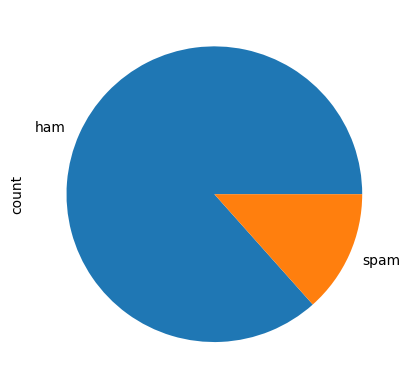

In [9]:
df['label'].value_counts().plot(kind='pie')
plt.show()

In [10]:
def get_length(data):
    return len(data)
df['message_len']=df['message'].apply(get_length)

In [11]:
df

,label,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
print('Maximum Spam message length is',df[df['label']=='spam']['message_len'].max(),'\n')
print('Minimum Spam message length is',df[df['label']=='spam']['message_len'].min())

Maximum Spam message length is 224 

Minimum Spam message length is 13


## Text Pre-processing

In [14]:
nlp=spacy.load('en_core_web_sm') # make a spacy object
def text_preprocessing(data):
    filter_token=''
    for token in nlp(data):
        if not token.is_punct and not token.is_stop:
            filter_token+=(token.lower_+' ')
    return filter_token

df['message']=df['message'].apply(text_preprocessing)

In [15]:
df

,label,message,message_len
0,ham,jurong point crazy available bugis n great wor...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,u dun early hor u c,49
4,ham,nah think goes usf lives,61
...,...,...,...
5567,spam,2nd time tried 2 contact u. u won å£750 pound ...,161
5568,ham,ì b going esplanade fr home,37
5569,ham,pity mood suggestions,57
5570,ham,guy bitching acted like interested buying week...,125


In [16]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['message']).toarray()
y = df['label']

In [17]:
def hamorspam(data):
    if data=='ham':
        return 0
    return 1
y=y.apply(hamorspam)

In [18]:
# applying train test split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42,stratify=df['label'])

## Model development using different algorithm

In [19]:
# using Logistic Regression

reg= LogisticRegression().fit(x_train, y_train)
y_pred_lr=reg.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.9505165851005981

In [21]:
# using KNN-classifier

neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred_knn=neigh.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.912452419793366

In [23]:
# using naive_bayes

clf = MultinomialNB().fit(x_train,y_train)
y_pred_naive=clf.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_naive)

0.9679173463839043